# Predicting a Film's IMDb Rating via Regression and Deep Learning

![hello](images/cinema.png)

## Author: [Patricio Contreras](https://www.linkedin.com/in/pcontreras97/)

## 3.b Exploratory Data Analysis Pt. 2

Now that we've cleaned our initial DataFrame, saved a version with budget and revenue data, and are free of missing values, let's see how the changes made in the previous notebook affected our data.  After plotting our histograms, boxplots, and reviewing our categorical features, we'll make sure our data is ready to be used for our modelling notebook!

In [1]:
# import necessary Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Rather than reading in the original dataset from Kaggle, we'll read in `data/df.csv` along with `data/df_budget.csv`:

In [2]:
# reading in csv from prev notebook
df = pd.read_csv("data/df.csv")
# dimension of df
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

df.head()

Number of rows: 34824
Number of columns: 13


,imdb_id,id,title,original_language,genre,belongs_to_franchise,production_company,release_date,runtime,popularity,is_Adult,numVotes,averageRating
0,tt0114709,862,Toy Story,en,Animation,1,Walt Disney Pictures,1995-10-30,81.0,21.946943,0,897995.0,8.3
1,tt0113497,8844,Jumanji,en,Adventure,1,TriStar Pictures,1995-12-15,104.0,17.015539,0,312530.0,7.0
2,tt0113228,15602,Grumpier Old Men,en,Romance,1,Lancaster Gate,1995-12-22,101.0,11.712900,0,24475.0,6.7
3,tt0114885,31357,Waiting to Exhale,en,Comedy,0,Twentieth Century Fox,1995-12-22,127.0,3.859495,0,9701.0,6.0
4,tt0113041,11862,Father of the Bride Part II,en,Comedy,1,Sandollar Productions,1995-02-10,106.0,8.387519,0,34926.0,6.1


In [3]:
# reading in csv with budget, revenue, and cert information
df_budget = pd.read_csv("data/df_budget.csv")
# dimension of df_budget
print("Number of rows:", df_budget.shape[0])
print("Number of columns:", df_budget.shape[1])

df_budget.head()

Number of rows: 5053
Number of columns: 16


,imdb_id,id,title,budget,revenue,original_language,genre,belongs_to_franchise,production_company,release_date,cert,runtime,popularity,is_Adult,numVotes,averageRating
0,tt0114709,862,Toy Story,30000000.0,373554033.0,en,Animation,1,Walt Disney Pictures,1995-10-30,G,81.0,21.946943,0,897995.0,8.3
1,tt0113497,8844,Jumanji,65000000.0,262797249.0,en,Adventure,1,TriStar Pictures,1995-12-15,PG,104.0,17.015539,0,312530.0,7.0
2,tt0114885,31357,Waiting to Exhale,16000000.0,81452156.0,en,Comedy,0,Twentieth Century Fox,1995-12-22,R,127.0,3.859495,0,9701.0,6.0
3,tt0114576,9091,Sudden Death,35000000.0,64350171.0,en,Action,1,Universal Pictures,1995-12-22,R,106.0,5.231580,0,32516.0,5.8
4,tt0113189,710,GoldenEye,58000000.0,352194034.0,en,Adventure,1,Eon Productions,1995-11-16,PG-13,130.0,14.686036,0,240533.0,7.2


Looks like everything is exactly as expected.  The dimensions of both DataFrames are the same as before and the data itself was read in properly.

### Check Missing Values

Let's quickly check that both our DataFrames don't have missing values:

In [4]:
# number of missing values in both DataFrames
print("Number of missing values in df:", df.isna().sum().sum())
print("Number of missing values in df_budget:", df_budget.isna().sum().sum())

Number of missing values in df: 0
Number of missing values in df_budget: 0


### Check Column Data Types

Now, let's check if the data types for each column were preserved:

In [5]:
# data type per column in df
df.dtypes

imdb_id                  object
id                        int64
title                    object
original_language        object
genre                    object
belongs_to_franchise      int64
production_company       object
release_date             object
runtime                 float64
popularity              float64
is_Adult                  int64
numVotes                float64
averageRating           float64
dtype: object

In [6]:
# data type per column in df_budget
df_budget.dtypes

imdb_id                  object
id                        int64
title                    object
budget                  float64
revenue                 float64
original_language        object
genre                    object
belongs_to_franchise      int64
production_company       object
release_date             object
cert                     object
runtime                 float64
popularity              float64
is_Adult                  int64
numVotes                float64
averageRating           float64
dtype: object

The only column that needs data type fixing for both DataFrames is `release_date`:

In [7]:
# changing release_date to datetime object
df["release_date"] = pd.to_datetime(df["release_date"])
df_budget["release_date"] = pd.to_datetime(df_budget["release_date"])

## Visualising our Data

Now that we've properly read in the data, let's see how the changes made affected each variable in `df` *and* `df_budget`.

### Numeric Data

As done in the previous notebook, exploring the numeric columns in both DataFrames will be done by visualising the distributions through histograms and boxplots:

#### `df`

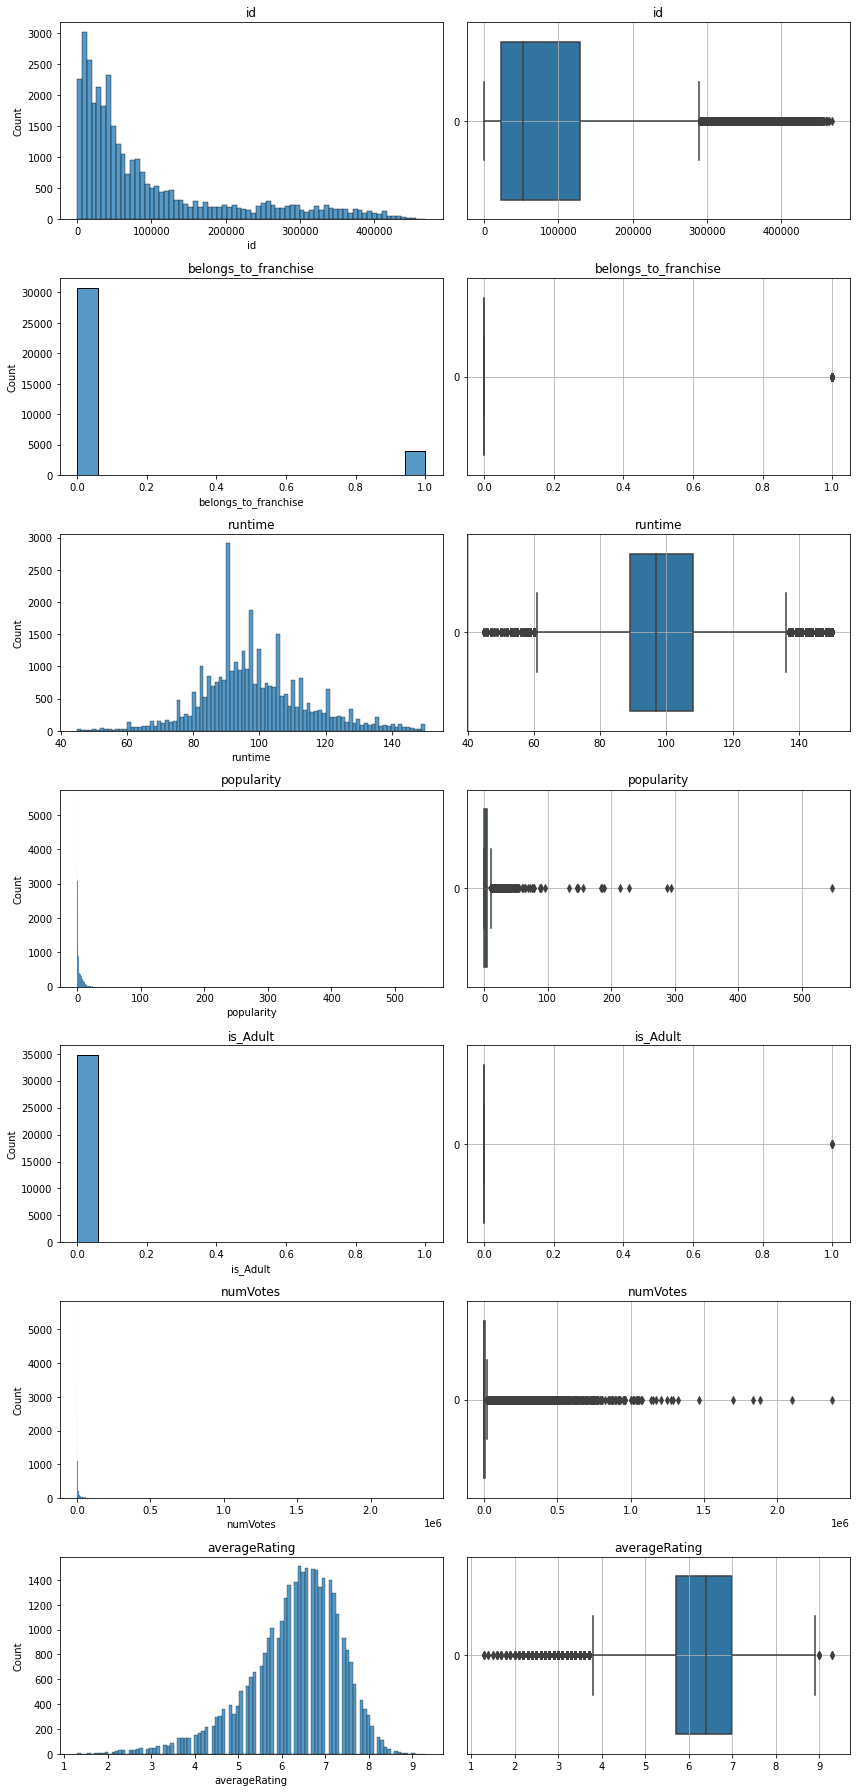

In [8]:
from Code import eda

fig, axes = plt.subplots(7, 2, figsize = (12, 25))
# distributions of numeric columns`
eda.plot_numeric(df, fig, axes)

The main takeaways from these plots are as follows:

* `belongs_to_franchise` also has most of its entries set to 0 (although not as strong as `is_Adult`)

* Now that we've filtered `runtime` to only include films less than or equal to 2.5 hours, the distribution is much more normal-like, although the boxplot does show outliers on both ends

* `popularity` has most of its values close to 0 and has a heavy right skewness.  According to the boxplot, a point is considered an outlier if its value is pretty much anything except 0

* `is_Adult` has almost all its entries set to 0, which means we'll probably have to drop this column

* Despite updating `df`, the frequency distribution for `numVotes` is still barely visible due to the large frequency imbalance present.  As the histogram shows, most films have a very small `numVotes` and all other counts were labelled as "outliers" according to the boxplot

* `averageRating` has a slight negative skewness (as confirmed by the boxplot) and most films have an IMDb rating close to 7.  Through data cleaning, we were able to get rid of the 3,000 films with a rating close to 0

---

#### `df_budget`

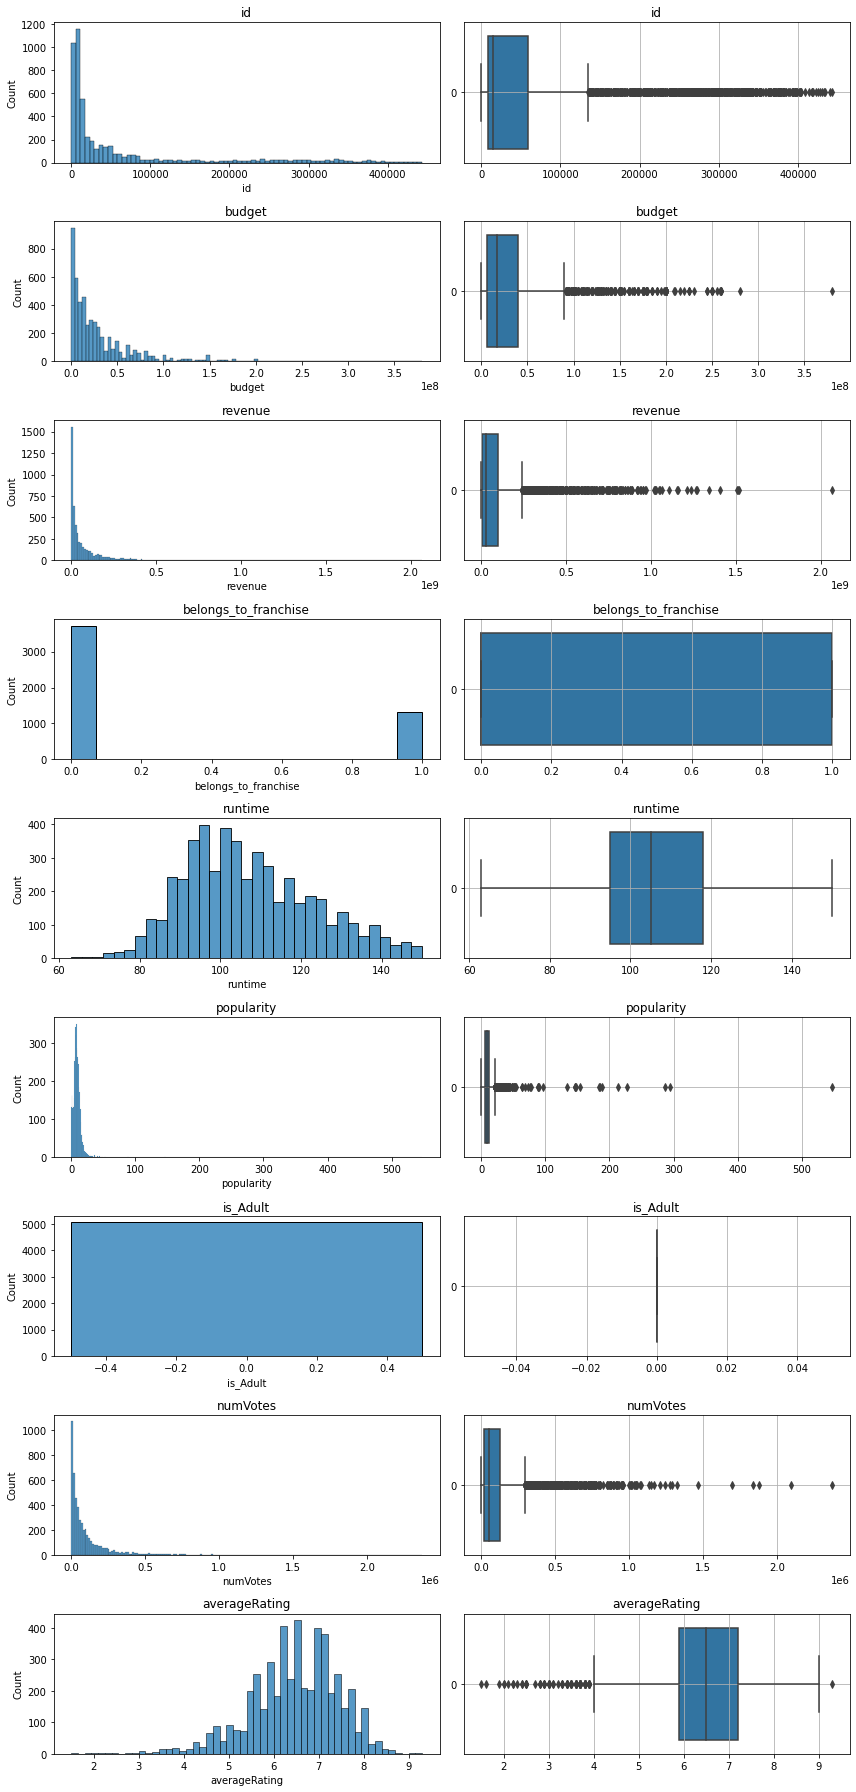

In [9]:
fig, axes = plt.subplots(9, 2, figsize = (12, 25))
# distributions of numeric columns`
eda.plot_numeric(df_budget, fig, axes)

The main takeaways from these plots are as follows:

* `budget` has a heavy right-skewed distribution with most films having a budget less than 50 million

* `revenue` has a stronger right-skewed distribution!  The scale in both our plots is in the billions!

* The distribution of `belongs_to_franchise` is similar to the one seen in `df`, however, more films belong to a franchise here than in our previous DataFrame

* The distribution for `runtime` looks more normal-like than the same variable in `df`.  No outliers are seen in the boxplot and the centre falls around 100 minutes

* As seen with `df`, `popularity` has a heavy right-skewed distribution with most films having a popularity score less than 50

* No adult films are present in `df_budget`

* Although the distribution for `numVotes` is still right-skewed, the histogram and boxplots are now more visible than before

* As seen with `df`, the distribution of our response variable is left-skewed and most films still have an IMDb rating close to 7.0

----

### Visualising the Relationship Between Predictor and Response

In addition to plotting the distribution of each individual variable, let's also take a look at how our numeric features relate to our response variable: `averageRating`

#### `df`

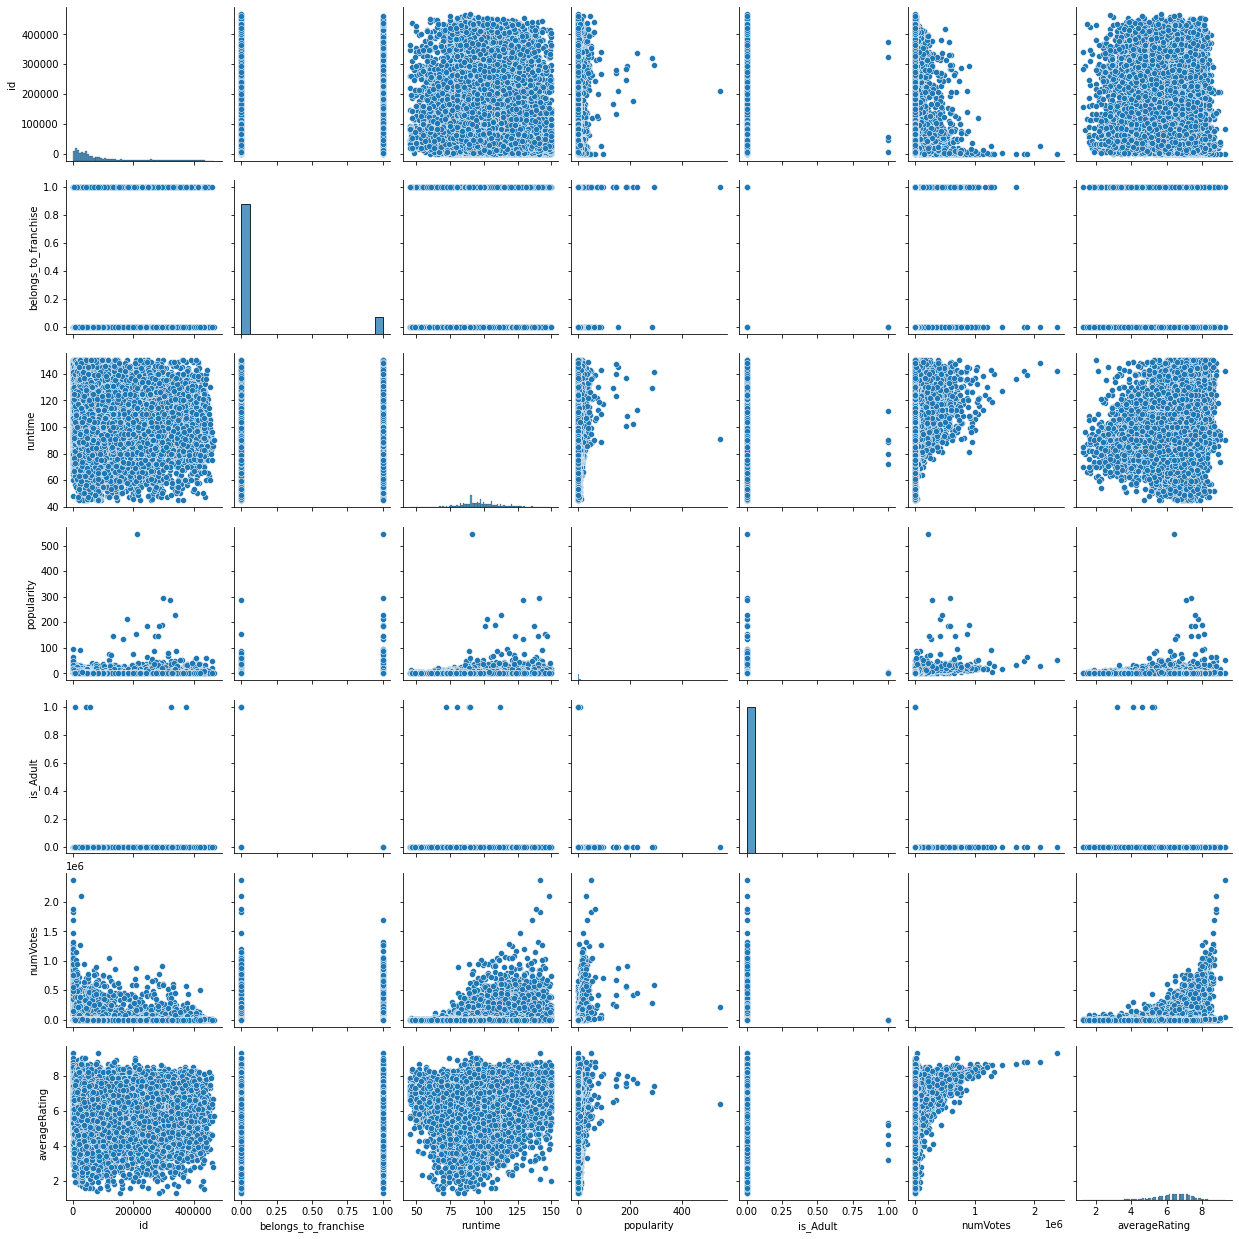

In [10]:
# pairs plot of each numeric variable in df
sns.pairplot(df);

(Specifically looking at the last row) `averageRating` doesn't really seem to have a trend with any of our numeric features!  

* The IMDb rating does not really seem to change whether a film belongs to a franchise or not.  
* Despite `runtime` being the only variable with a normal-like distribution, the scatterplot does not really show much of a relationship with `averageRating` as all the points are scattered everywhere.  
* Given the distribution of `popularity`, the plot of `averageRating` vs. `popularity` has most points concentrated in really low `popularity` values and `averageRating` ranges from 2 all the way to over an 8.  
* Even though the very few adult films have relatively low IMDb ratings, the *non-adult* films have IMDb ratings all over the place
* It seems like as we increase the number of votes per film, the IMDb rating goes up, **however**, really low number of votes also have a high IMDb rating...  

**Note**: some features _do_ seem to have a relationship with one another (`popularity` - `belongs_to_franchise`).  Correlations should be calculated as this could result in multicollinearity problems later on.

---

#### `df_budget`

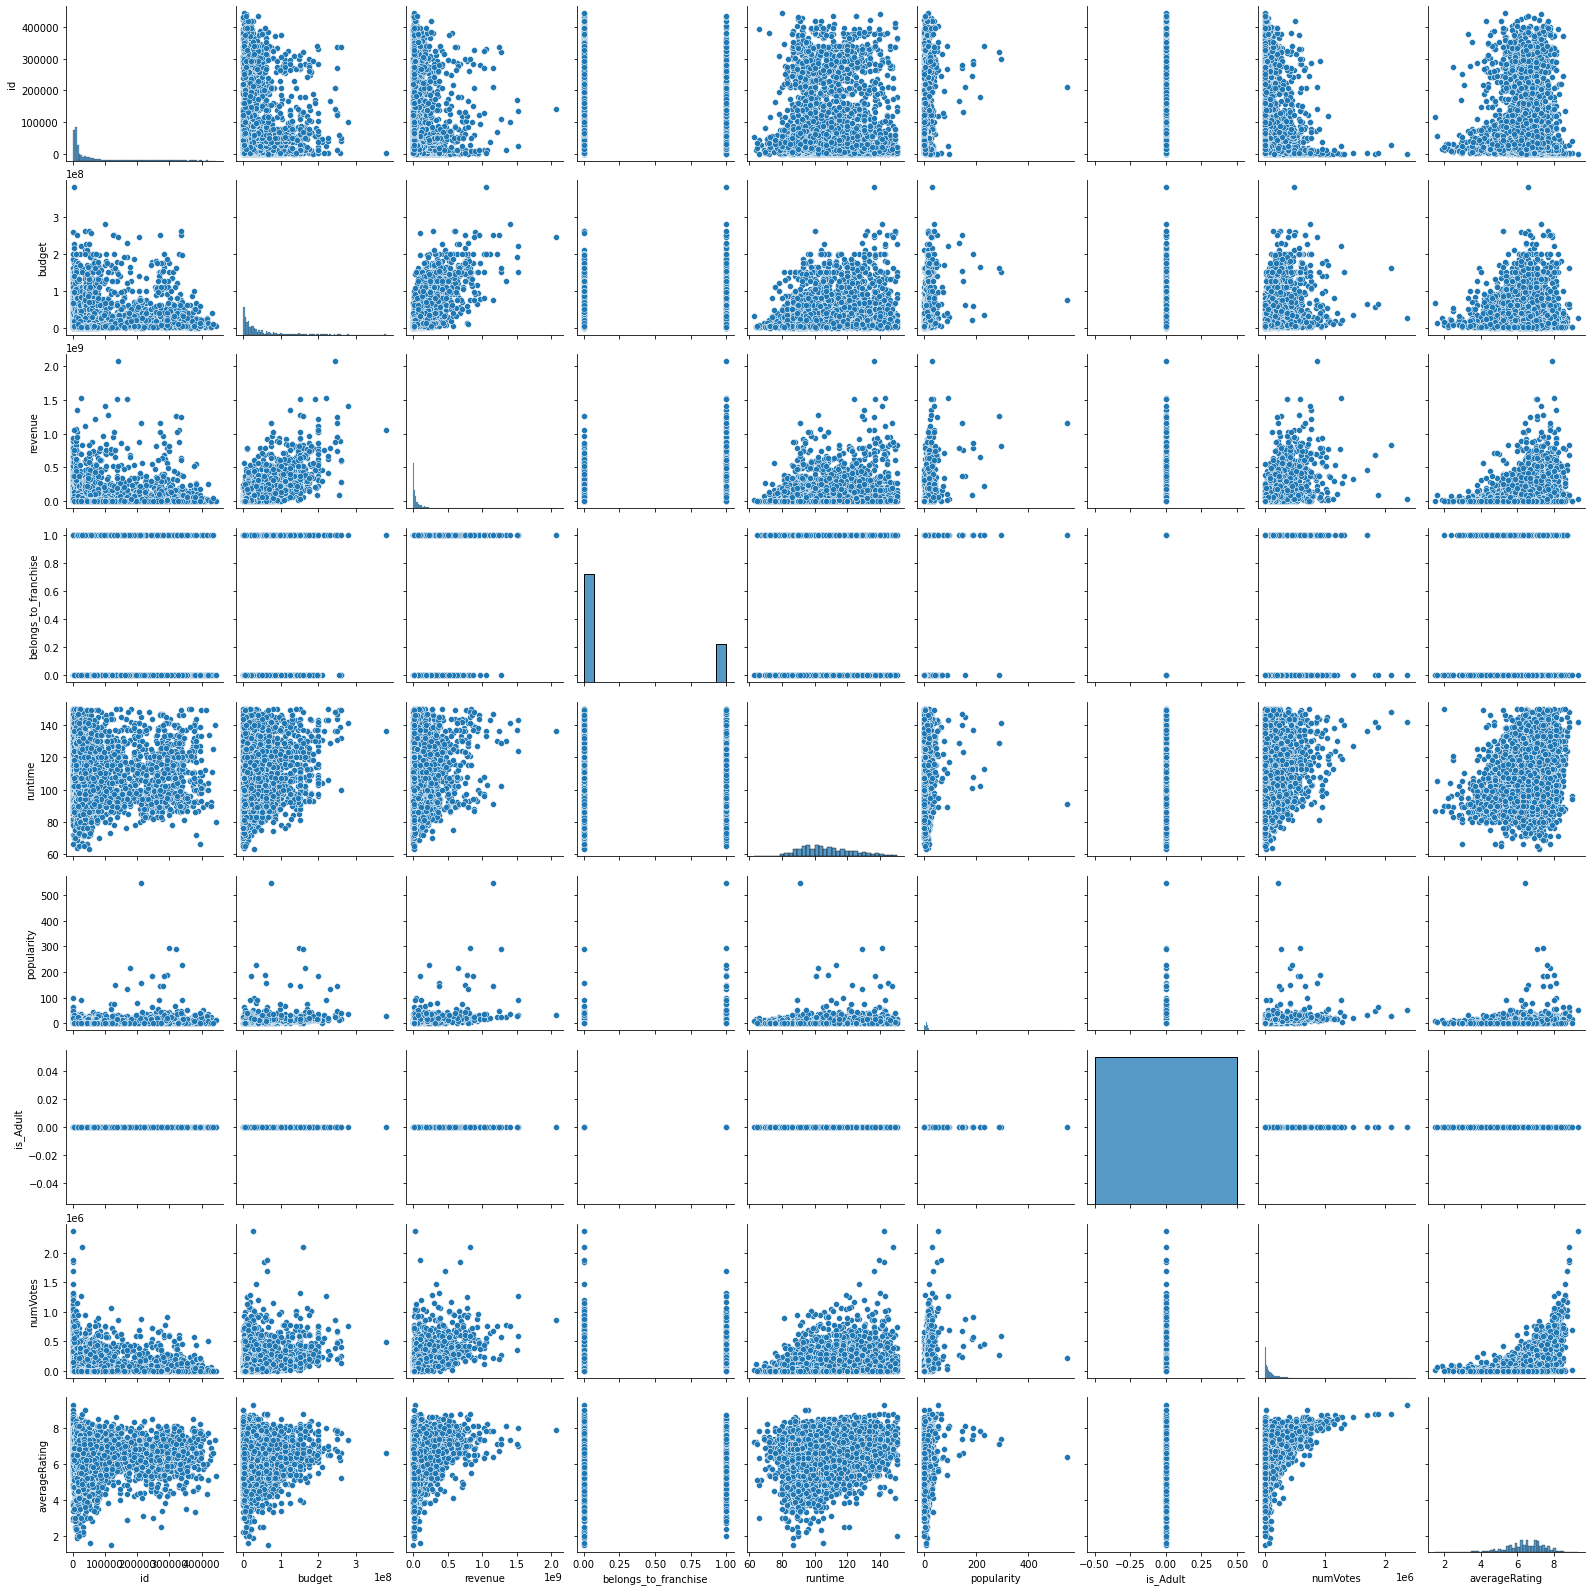

In [11]:
# pairs plot of each numeric variable in df_budget
sns.pairplot(df_budget);

This time it looks like some of our numeric features _do_ have a trend with our response variable:  

* The scatterplot for `averageRating` vs. `budget` shows a positive relationship between the two variables.  Although some films with low budgets have high IMDb ratings, the general pattern is that as we increase `budget`, we have higher IMDb ratings
* `revenue` also follows a similar pattern than did `budget`
* The IMDb rating does not really seem to change whether a film belongs to a franchise or not.  
* This time `runtime` seems to have a slight positive relationship with `averageRating`.  It may not be the strongest upward trend, but the scatterplot reveals that (in general) as we increase `runtime`, `averageRating` is also expected to increase  
* `popularity` hasn't really changed much from before 
* `numVotes` still has the same relationship with `averageRating` than before

**Note**: some features _do_ seem to have a relationship with one another (`budget` - `revenue`, `popularity` - `belongs_to_franchise`).  Correlations should be calculated as this could result in multicollinearity problems later on.

---

Before we move on to our categorical variables, let's see how `release_date` was affected by our changes made in the previous notebook:

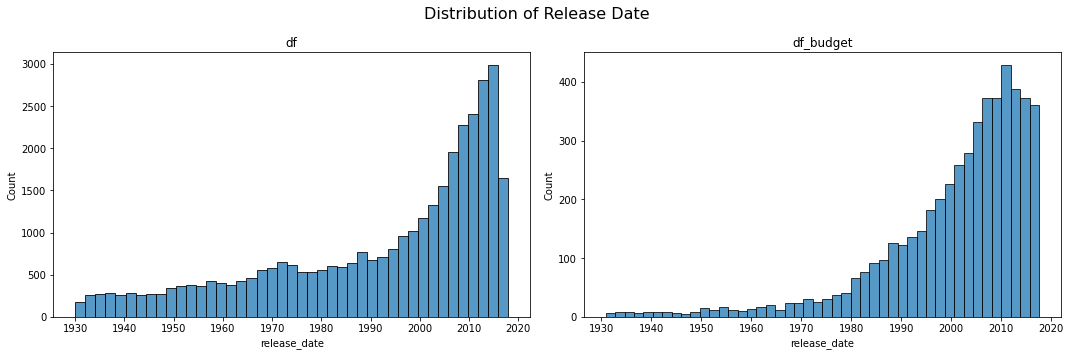

In [12]:
# distribution of `release_date` in df and df_budget
fig, axes = plt.subplots(1, 2, figsize = (15, 5))
fig.suptitle("Distribution of Release Date", fontsize = 16)
sns.histplot(df["release_date"], ax = axes[0])
axes[0].set_title("df")
sns.histplot(df_budget["release_date"], ax = axes[1])
axes[1].set_title("df_budget");

fig.tight_layout()

Both distributions are left-skewed, however, `df_budget` has the majority of its films from the 1990s onwards (`df` is also left-skewed, but there's more data on older films).

---
### Categorical Data

Similar to how we proceeded with our numeric features, we'll first investigate each categorical variable individually and then visualise the relationship with our response.

#### `df`

In [13]:
# extracting non-numeric columns
df_object = df.select_dtypes(include = object)
# freq distribution per column
for f in df_object.columns:
    if f == "imdb_id" or f == "title":
        continue
    print("FEATURE:", f)
    print(df[f].value_counts(normalize = True))
    print("------------------------")

FEATURE: original_language
en    0.703222
fr    0.056714
it    0.033569
ja    0.033052
es    0.023834
        ...   
pa    0.000029
sm    0.000029
gl    0.000029
hy    0.000029
iu    0.000029
Name: original_language, Length: 88, dtype: float64
------------------------
FEATURE: genre
Drama              0.295773
Comedy             0.211521
Action             0.108144
Documentary        0.067942
Horror             0.063060
Crime              0.042758
Thriller           0.040690
Adventure          0.036067
Romance            0.027251
Fantasy            0.015478
Animation          0.014674
Science Fiction    0.013496
Mystery            0.013094
Western            0.011400
Music              0.010137
Family             0.009218
War                0.008672
History            0.006002
Foreign            0.002642
Biography          0.001350
TV Movie           0.000345
\N                 0.000115
Musical            0.000086
Film-Noir          0.000029
Adult              0.000029
Sci-Fi          

A couple of important notes to mention:

* Films in English make up about 70% of the entire DataFrame.  The second most common language in `df` has significantly less films (70% vs. 5.7%).
* Similarly, even though `genre` has 26 unique movie genres, the first 10 already make up around 90% of the DataFrame
* `production_company` is the variable with most variance (more unique values).  The top production company doesn't have a substantial lead over the second spot as was the case in our previous categorical variables

#### `df_budget`

In [14]:
# extracting non-numeric columns
df_object = df_budget.select_dtypes(include = object)
# freq distribution per column
for f in df_object.columns:
    if f == "imdb_id" or f == "title":
        continue
    print("FEATURE:", f)
    print(df_budget[f].value_counts(normalize = True))
    print("------------------------")

FEATURE: original_language
en    0.905403
fr    0.016426
ru    0.011676
hi    0.010489
es    0.007322
ja    0.007124
zh    0.005739
it    0.005145
ko    0.004948
de    0.003760
cn    0.002969
da    0.001979
ta    0.001781
nl    0.001385
sv    0.001385
pt    0.001385
ml    0.001385
pl    0.000792
no    0.000792
ro    0.000792
te    0.000792
tr    0.000792
fi    0.000594
id    0.000594
sr    0.000594
he    0.000594
hu    0.000396
th    0.000396
xx    0.000396
ur    0.000396
fa    0.000198
kn    0.000198
nb    0.000198
is    0.000198
el    0.000198
af    0.000198
ca    0.000198
bm    0.000198
vi    0.000198
Name: original_language, dtype: float64
------------------------
FEATURE: genre
Drama              0.231941
Comedy             0.207402
Action             0.179102
Adventure          0.075203
Horror             0.064318
Crime              0.049476
Thriller           0.038393
Animation          0.028696
Fantasy            0.026519
Romance            0.021967
Science Fiction    0.019988


* Despite there being less languages in this DataFrame, English films make up around 91% of all the data!
* Most of the top 10 genres found in `df` are also found here (Documentary and Animation are the only differences)
* `production_company` is still the most diversified categorical variable
* 51% of `df_budget` is made up of R-rated films!

---

### Visualising the Relationship Between Predictor and Response

In addition to these frequency counts, (as we did with our numeric features), let's visualise the relationship these categorical variables have with `averageRating`.  Given that some features have a lot of levels (`production_company` has 14,768/1,770 unique values), we'll only display the top 5 levels per categorical feature

#### `df`

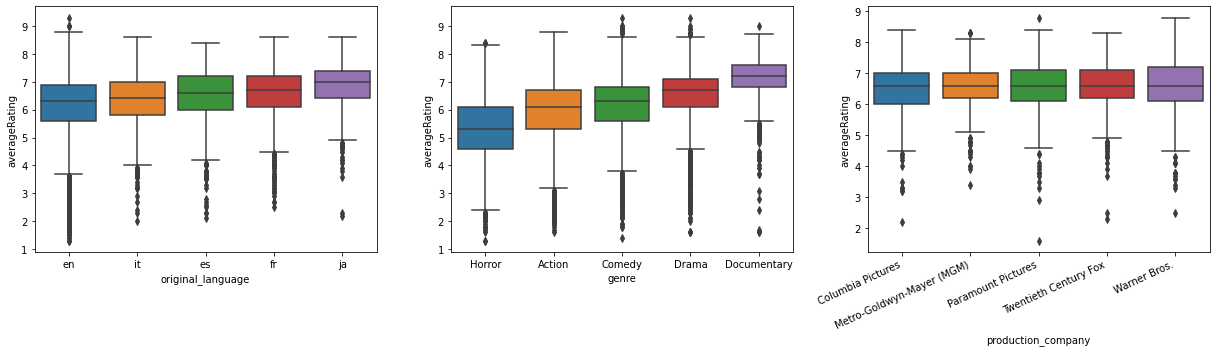

In [15]:
fig, axes = plt.subplots(1, 3, figsize = (17,5))

for i, col in enumerate(["original_language", "genre", "production_company"]):
    data = df[df[col].isin(df[col].value_counts().head().index)]
    my_order = data.groupby(col)["averageRating"].median().sort_values().index
    ax = axes[i]
    plot = sns.boxplot(x = col, y = "averageRating", order = my_order,
                       data = data, ax = ax)
    if col == "production_company":
        plot.set_xticklabels(plot.get_xticklabels(), 
                             rotation = 25, horizontalalignment = "right")

fig.tight_layout()

* The greatest differences in the distribution of `averageRating` can be seen in `genre`
* Horror films have the worst IMDb ratings while documentaries stand out from the rest
* Even though English is the most common language in `df`, IMDb rating does not change significantly
* All of the boxplots have outliers in the lower end of the IMDb rating spectrum.

---

#### `df_budget`

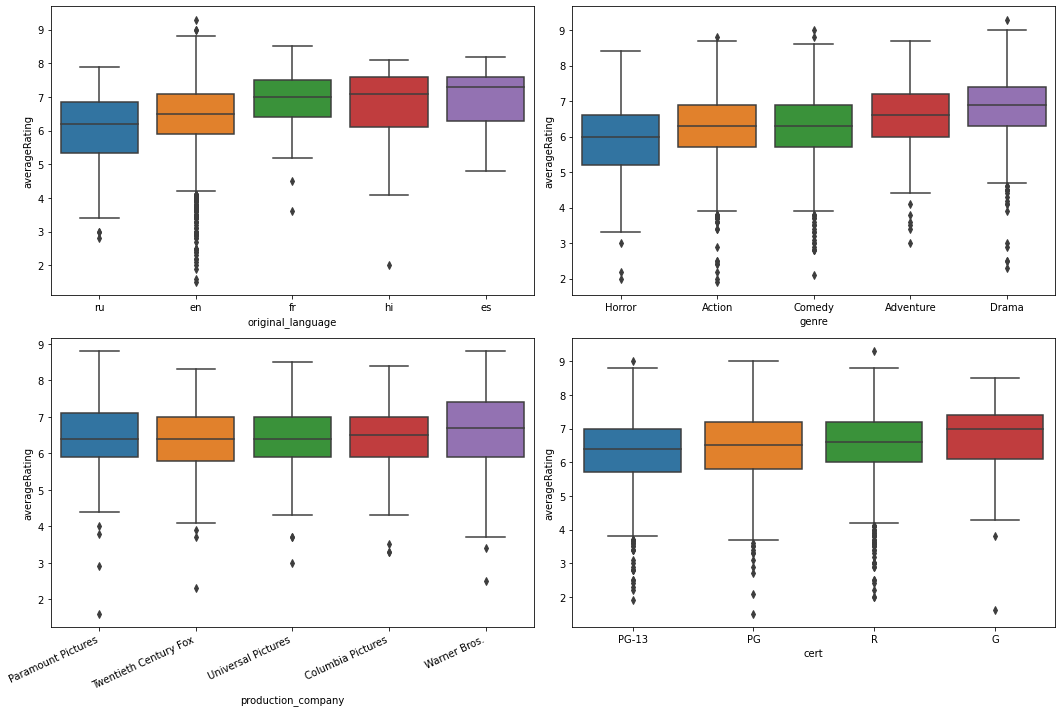

In [16]:
fig, axes = plt.subplots(2, 2, figsize = (15,10))

for i, name in enumerate(["original_language", "genre", 
                          "production_company", "cert"]):
    row = i // 2
    col = i % 2
    top_5 = df_budget[name].value_counts().head().index
    data = df_budget[df_budget[name].isin(top_5)]
    my_order = data.groupby(name)["averageRating"].median().sort_values().index
    ax = axes[row, col]
    # boxplots
    plot = sns.boxplot(x = name, y = "averageRating", order = my_order,
                       data = data, ax = ax)
    if name == "production_company":
        plot.set_xticklabels(plot.get_xticklabels(), 
                             rotation = 25, horizontalalignment = "right")

fig.tight_layout()

* The biggest differences in `averageRating` are shown in `original_language` and `genre`
* Horror is still the worst performing genre out of the top 5
* Warner Bros. is still the best production company in terms of IMDb rating
* There isn't a huge difference in IMDb rating based on certification, however, G-rated films have a slightly higher IMDb rating than the rest

---

### Comments on Exploratory Data Analysis

The exploratory data analysis for our numeric columns suggests that we should get rid of `is_Adult` in both DataFrames given that most of our films are "non-adult".  Furthermore, some variables like `id` or `numVotes` should probably be dropped, as these don't really offer _any_ predictive power.

The EDA done for our categorical columns has allowed us learn more about the distribution of our categorical variables and how they relate to `averageRating`.  Unfortunately, there is a huge class imbalance in `original_language`, as English seems to be the predominant language in both DataFrames (70% vs. 91%).  The top 10 genres make up around 90% of the data in both DataFrames and `production_company` is a very diverse feature!

## 4.b Final Data Prep

The last step before our modelling stage involves cleaning the data one more time.  We'll begin by going over our numeric columns and then advance onto our categorical features.

### Cleaning `df` and `df_budget` - Numeric Features

#### `is_Adult`

As mentioned before, `is_Adult` has a high class imbalance with over 90% of films being labelled as "non-adult" in `df` and 100% in `df_budget`.  This means that we don't have enough data on adult films to train our models properly later on.  We'll remove all adult films from `df` and `df_budget` and drop the column completely:

In [17]:
# remove adult films
df = df[df["is_Adult"] == 0]
# drop `is_Adult` completely from df and df_budget
df = df.drop("is_Adult", axis = 1)
df_budget = df_budget.drop("is_Adult", axis = 1)

#### `id` and `numVotes`

Another important concern we'll handle in this step of the cleanup process is get rid of `id` and `numVotes`.  Even though `id` helped us retrieve the data for `belongs_to_franchise`, it is no longer useful and won't have any predictive power in our modelling stage.  Furthermore, the number of votes a film receives is not necessarily correlated with its IMDb rating.  Therefore, we'll get rid of both columns:

In [18]:
# drop `id` and `numVotes` from df and df_budget
df = df.drop(["id", "numVotes"], axis = 1)
df_budget = df_budget.drop(["id", "numVotes"], axis = 1)

### Cleaning `df` and `df_budget` - Categorical Features

#### `original_language`

As mentioned before, unfortunately this variable has a huge class imbalance.  English is the most common language in both DataFrames and the second most common language is far behind in both cases (70% vs. 5.7% and 91% vs. 1.6%).  We also can't really make this variable binary since the amount of data in each class will be hugely disproportional.

Given these reasons, I have decided to drop `original_language` completely:

In [19]:
# drop original_language from both DataFrames
df = df.drop("original_language", axis = 1)
df_budget = df_budget.drop("original_language", axis = 1)

#### `genre`

Both DataFrames seem to share the same top 10 genres (with the exception of Documentary and Animation).  Furthermore, these genres make up around 90% of the entire DataFrame.  It is also important to note that these aren't just any genres, but considered by many to be the most popular film genres out there!

Given the nature of this variable and the aforementioned reasons, we'll keep the top 10 genres for each DataFrame and label all other genres as "Other":

In [20]:
# keep top 10 genres and label all else as "Other"
for data in [df, df_budget]:
    # top 10 genres
    top10 = data["genre"].value_counts().head(10).index
    data["genre"] = data["genre"].apply(lambda g: g if g in top10 else "Other")

#### `production_company`

The reason we kept this variable is because most people value which production company produced the film.  It is something that a lot of people take into consideration and a common film feature/characteristic.

According to Wikipedia's [Major Film Studios](https://en.wikipedia.org/wiki/Major_film_studios) the top 5 major film studios are:
* NBCUniversal
* ViacomCBS
* WarnerMedia
* Walt Disney Studios
* Sony Pictures

These popular and highly successful movie studios have offered plenty of movies through the years that generated millions and resulted in good IMDb ratings!  In essence, people expect really "good stuff" from these prestigious production companies.

Given this piece of information, I thought it'd be a good idea to see how these studios would affect our results and how they compare to all other production companies in the data.  Therefore, in this section we'll do 2 major things:

1. Group the top 5 film studios under one big umbrella (New Line Cinema, Castle Rock Entertainment, etc. should fall under "Warner")
2. Once we have our top 5 film studios, label any other production company (not owned by our top 5) as "Other"

##### Step 1

In [21]:
from Code import data_cleaning as dc
# companies under these film studios
Universal_group = ["Universal", "Focus Features", "DreamWorks", "Illumination",
                  "Amblin Partners", "Working Title Films"]
for c in Universal_group:
    df = dc.prod_company_bin(df, c, "NBCUniversal")
    df_budget = dc.prod_company_bin(df_budget, c, "NBCUniversal")
    
Viacom_group = ["Paramount", "Miramax", "MTV Films", "Nickelodeon",
               "CBS", "VH1 Films", "Comedy Central Films", "Viacom",
               "Melange Pictures"]
for c in Viacom_group:
    df = dc.prod_company_bin(df, c, "ViacomCBS")
    df_budget = dc.prod_company_bin(df_budget, c, "ViacomCBS")
    
Warner_group = ["Warner", "New Line Cinema", "CNN Films", "HBO",
                "DC Films", "Cartoon Network", "Wang Film", "Castle Rock Entertainment",
                "Cinemax", "Flagship Entertainment", "Spyglass",
                "Turner Entertainment", "Village Roadshow Pictures"]
for c in Warner_group:
    df = dc.prod_company_bin(df, c, "WarnerMedia")
    df_budget = dc.prod_company_bin(df_budget, c, "WarnerMedia")
    
Disney_group = ["Disney", "Lucasfilm", "Marvel", "Pixar", "20th", "A&E", 
                "Searchlight", "ESPN", "Touchstone Pictures", "Twentieth", "Fox"]
for c in Disney_group:
    df = dc.prod_company_bin(df, c, "Walt Disney Studios")
    df_budget = dc.prod_company_bin(df_budget, c, "Walt Disney Studios")
    
Sony_group = ["Sony", "Columbia", "TriStar", "Screen Gems",
             "Destination Films", "Affirm Films", "Funimation"]
for c in Sony_group:
    df = dc.prod_company_bin(df, c, "Sony Pictures")
    df_budget = dc.prod_company_bin(df_budget, c, "Sony Pictures")

##### Step 2

In [22]:
# label all other production companies as "Other"
top5 = ["NBCUniversal", "ViacomCBS", "WarnerMedia", "Walt Disney Studios", "Sony Pictures"]
df["production_company"] = df["production_company"].apply(lambda pc: pc if pc in top5 else "Other")
df_budget["production_company"] = df_budget["production_company"].apply(lambda pc: pc if pc in top5 else "Other")

Great, now let's check the distribution of `production_company` in both DataFrames:

In [23]:
# distribution of production_company in df and df_budget
for data in [df, df_budget]:
    print("Distribution of production_company:")
    print(data["production_company"].value_counts(normalize = True))
    print("-----------------------------------")

Distribution of production_company:
Other                  0.860306
Walt Disney Studios    0.038025
WarnerMedia            0.032339
Sony Pictures          0.024757
NBCUniversal           0.022459
ViacomCBS              0.022114
Name: production_company, dtype: float64
-----------------------------------
Distribution of production_company:
Other                  0.606372
Walt Disney Studios    0.107263
WarnerMedia            0.083119
Sony Pictures          0.073224
NBCUniversal           0.068474
ViacomCBS              0.061548
Name: production_company, dtype: float64
-----------------------------------


#### `imdb_id`

Before moving on, we still need to address one more categorical feature: `imdb_id`.  This feature is generally considered an *identifier* since its sole purpose is to help the viewer identify what film we're considering at the moment.  For example, I used `imdb_id` while web scraping to extract the information for a particular film in `df`.  However, this feature isn't really correlated with the film's IMDb rating and should therefore *not* be considered in our modelling stage!  Therefore, I will drop this categorical feature as well:

In [24]:
# drop `imdb_id` from df and df_budget
df = df.drop("imdb_id", axis = 1)
df_budget = df_budget.drop("imdb_id", axis = 1)

### Splitting `release_date` into Month and Season

An important feature we haven't covered much is `release_date`.  Rather than focusing on the entire release date of the film, wouldn't it be better to investigate the effect *season* or *month of the year* has on IMDb rating???  The summer is *generally* known for blockbuster hits that not only bring in a lot of revenue, but also have good IMDb ratings!  Furthermore, January is known as the worst month for cinema and films with low IMDb ratings are released at this time.

In this section, we'll separate `release_date` into months of the year and season to include these variables later into our models:

In [25]:
# extract month
df["release_month"] = df["release_date"].dt.month
df_budget["release_month"] = df_budget["release_date"].dt.month

# group months into 4 seasons
# Jan-Mar (Winter), Apr-Jun (Spring), Jul-Sep (Summer), Oct-Dec (Fall)
df["release_season"] = pd.cut(df["release_month"], bins = [0,3,6,9,12], 
                              labels = ["Winter", "Spring", 
                                        "Summer", "Fall"]).astype(object)
df_budget["release_season"] = pd.cut(df_budget["release_month"], 
                                     bins = [0,3,6,9,12], 
                                     labels = ["Winter", "Spring", 
                                               "Summer", "Fall"]).astype(object)

# preview df
df.head()

,title,genre,belongs_to_franchise,production_company,release_date,runtime,popularity,averageRating,release_month,release_season
0,Toy Story,Other,1,Walt Disney Studios,1995-10-30,81.0,21.946943,8.3,10,Fall
1,Jumanji,Adventure,1,Sony Pictures,1995-12-15,104.0,17.015539,7.0,12,Fall
2,Grumpier Old Men,Romance,1,Other,1995-12-22,101.0,11.712900,6.7,12,Fall
3,Waiting to Exhale,Comedy,0,Walt Disney Studios,1995-12-22,127.0,3.859495,6.0,12,Fall
4,Father of the Bride Part II,Comedy,1,Other,1995-02-10,106.0,8.387519,6.1,2,Winter


Now that we've separated the month and season for each film in `df`, we can get rid of `release_date` from `df` and `df_budget`:

In [26]:
import calendar
# replace month numbers with names
df["release_month"] = df["release_month"].apply(lambda num: calendar.month_abbr[num])
df_budget["release_month"] = df_budget["release_month"].apply(lambda num: calendar.month_abbr[num])

# dropping release_date
df = df.drop("release_date", axis = 1)
df_budget = df_budget.drop("release_date", axis = 1)

## Moving onto Modelling!

We are officially done with our EDA and data prep.  Let's see how well our features are able to predict IMDb rating.

In [27]:
# reorganise columns
df = df[["title", "genre", "belongs_to_franchise", "production_company", "runtime",
        "popularity", "release_season", "release_month", "averageRating"]]
df_budget = df_budget[["title", "budget", "revenue", "genre", "belongs_to_franchise",
                      "production_company", "cert", "runtime", "popularity",
                      "release_season", "release_month", "averageRating"]]

# reset index
df = df.reset_index(drop = True)
df_budget = df_budget.reset_index(drop = True)
# final dimensions of df
print(df.shape)
# final dimensions of df_budget
print(df_budget.shape)
# save DataFrames
df.to_csv("data/final_df.csv", index = False)
df_budget.to_csv("data/final_dfbudget.csv", index = False)

(34819, 9)
(5053, 12)


To continue on with this project, please check out the [Regression notebook](Regression.ipynb)!